<a href="https://colab.research.google.com/github/reginaxy/Hotel_Analysis/blob/main/EDA_%2B_Data_Pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of Hotel Reviews in Europe**

**Import Libraries & Packages**

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns

from matplotlib import pyplot
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(15,8)})

**Import Hotel Reviews Dataset & display 5 data records**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Hotel_Analysis/Hotel_Datasets/515k_Hotel_Reviews.csv'
df = pd.read_csv(path)
df.head(5)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


## **Exploration of Dataset (Pre-cleaning)**

**Dataset Statistics**

**Number of rows and columns of dataset**

In [ ]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns.')

There are 515738 rows and 17 columns.


**Display the dataset information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

**Check for Missing Values**

In [ ]:
df.isna().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

**Observation:** 

There are 2 columns 'lat' and 'lng' that have 3268 missing values respectively.

**Overview of the numerical data**

In [ ]:
df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


### **Average Scores**

**Average Scores of hotels**

Text(0.5, 1.0, 'Average Scores given to hotels')

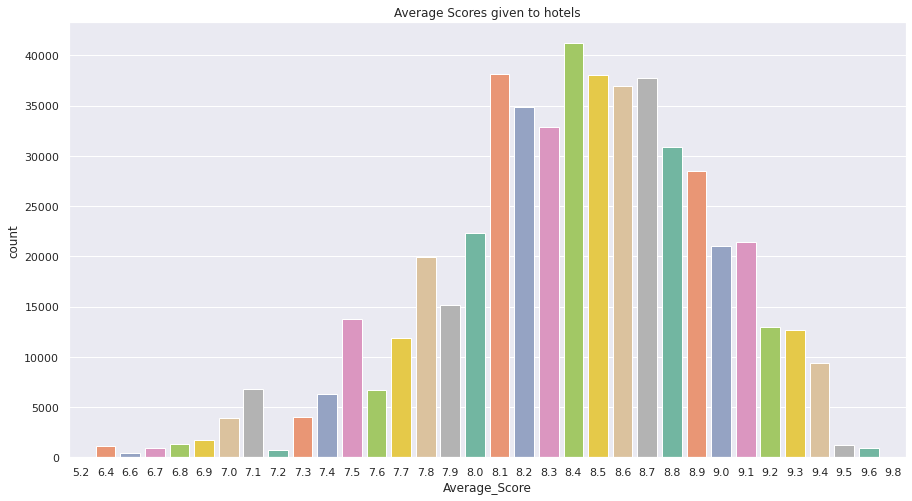

In [ ]:
ax = sns.countplot(x='Average_Score', data=df, palette = 'Set2')
plt.title('Average Scores given to hotels')

**Count of Average Scores**

In [ ]:
df['Average_Score'].describe()

count    515738.000000
mean          8.397487
std           0.548048
min           5.200000
25%           8.100000
50%           8.400000
75%           8.800000
max           9.800000
Name: Average_Score, dtype: float64

**Percentage of Average Score equal to or more than 8.0**

In [ ]:
(df['Average_Score'] >= 8.0).value_counts(normalize = True)

True     0.816482
False    0.183518
Name: Average_Score, dtype: float64

**Observation:**

Majority (over 80%) of the Average Score obtained was equal to or more than 8.0.

### **Reviews**

**Word Cloud**

In [ ]:
# Function to draw Word Cloud

from wordcloud import WordCloud

def wordcloud_draw(data, color = 'white'):
    words = ''.join(list(data.values))
    
    wordcloud = WordCloud(
                      background_color=color,
                      max_words=5000,
                     ).generate(words)
    plt.figure(1,figsize=(15, 8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

**Positive Word Cloud**

Positive words are as follows: -


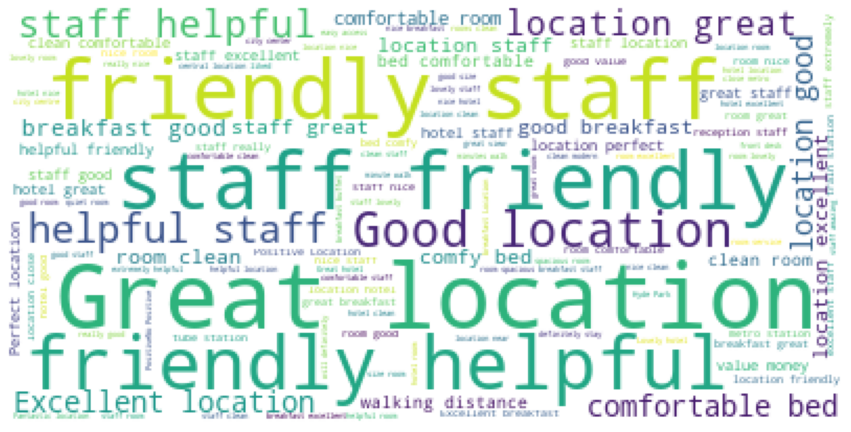

In [ ]:
# Positive Reviews Word Cloud

positivedata = df.Positive_Review

print("Positive words are as follows: -")
wordcloud_draw(positivedata,'white')

**Observation:**

Some of the commonly mentioned words in the positive reviews were **'staff', 'friendly', 'helpful', 'good location', 'comfortable bed'** etc.

**Negative Word Cloud**

Negative words are as follows: -


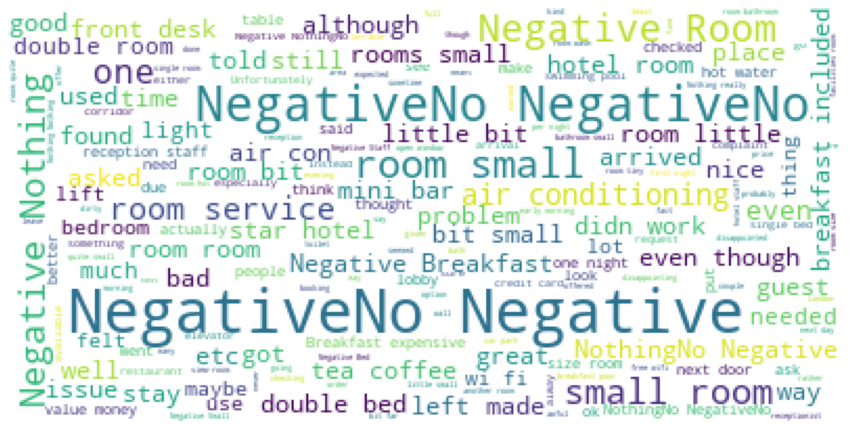

In [ ]:
# Negative Reviews Word Cloud

negativedata = df.Negative_Review

print("Negative words are as follows: -")
wordcloud_draw(negativedata,'white')

**Observation:**

1. Some of the commonly mentioned words in the negative reviews were **'No Negative'** or **'Nothing'**, which indicates that the reviewer did not provide a negative review. Hence, we will need to take note of this in the reviews cleaning step to ensure that these reviews are removed from the negative reviews.

2. Some other commonly mentioned words in the negative reviews are **'air conditioning', 'small room', room service'** etc.

**Word Occurences in Reviews**

**Frequently occuring tokens in Positive Reviews**

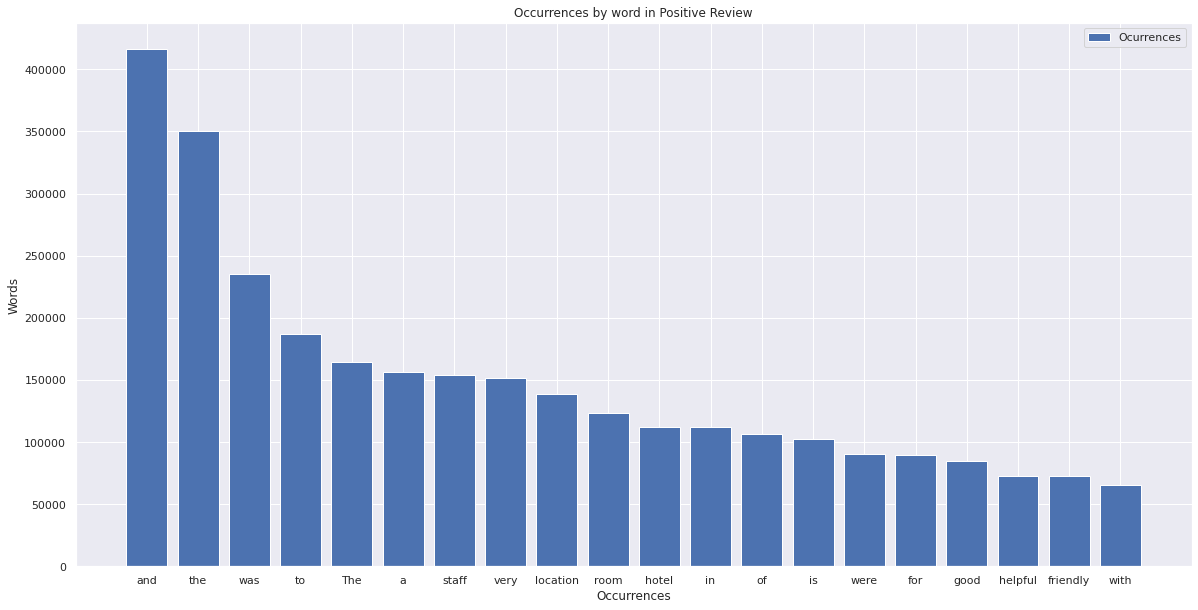

In [ ]:
# Plot frequently occuring tokens in Positive Reviews

from collections import Counter

review = df.Positive_Review.values
all_text2 = ' '.join(review)

# create a list of words
word_list = all_text2.split()

# Count all the words using Counter Method
count_words = Counter(word_list)

total_words = len(word_list)
sorted_words = count_words.most_common(total_words)[0:20]

n_groups = len(sorted_words)

vals_words = [x[1] for x in sorted_words]
legends_words = [x[0] for x in sorted_words]

fig, ax = plt.subplots(figsize=(20,10))

index = np.arange(n_groups)

rects1 = plt.bar(index, vals_words,
                 color='b',
                 label='Ocurrences')


plt.xlabel('Occurrences')
plt.ylabel('Words')
plt.title('Occurrences by word in Positive Review')
plt.xticks(index, legends_words)
plt.legend()

plt.show()

**Observation:**

The **Top 6 tokens ('and', 'the', 'was', 'to', The', 'a')** are words that bring no meaning to the reviews. We will need to remove these words in the text preprocessing phase before building our sentiment classification model.

**Frequently occuring tokens in Negative Reviews**

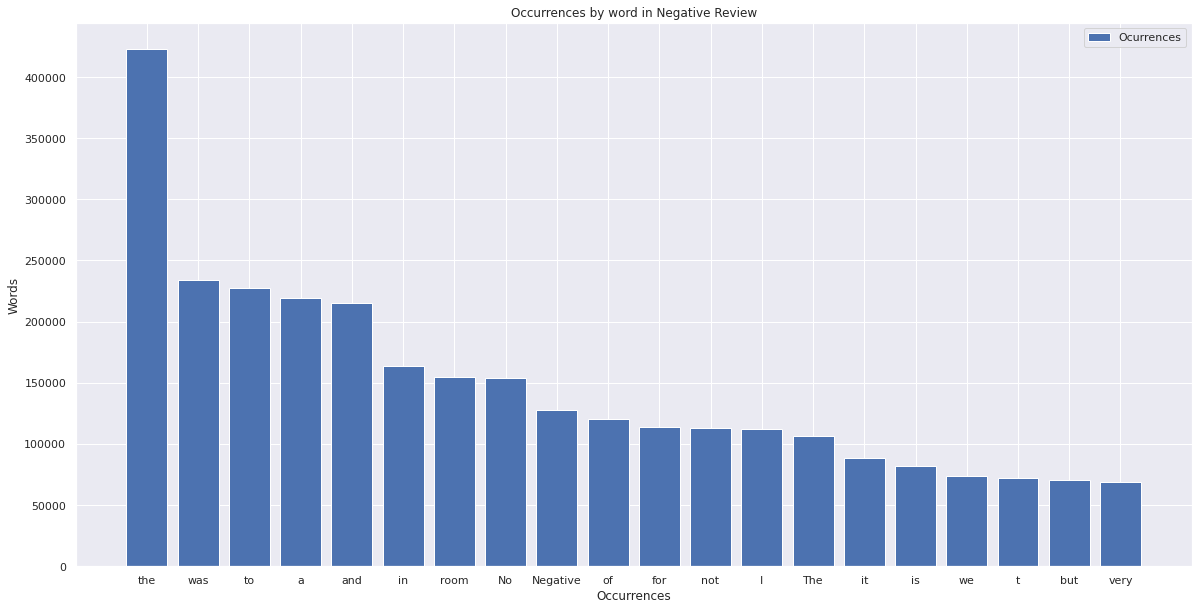

In [ ]:
# Plot frequently occuring tokens in Negative Reviews

from collections import Counter

review = df.Negative_Review.values
all_text2 = ' '.join(review)

# create a list of words
word_list = all_text2.split()

# Count all the words using Counter Method
count_words = Counter(word_list)

total_words = len(word_list)
sorted_words = count_words.most_common(total_words)[0:20]

n_groups = len(sorted_words)

vals_words = [x[1] for x in sorted_words]
legends_words = [x[0] for x in sorted_words]

fig, ax = plt.subplots(figsize=(20,10))

index = np.arange(n_groups)

rects1 = plt.bar(index, vals_words,
                 color='b',
                 label='Ocurrences')


plt.xlabel('Occurrences')
plt.ylabel('Words')
plt.title('Occurrences by word in Negative Review')
plt.xticks(index, legends_words)
plt.legend()

plt.show()

**Observation:**

Similarly, by observing the word occurences in the negative review, we observe that the **Top 6 tokens ('the', 'was', 'to', 'a', and', 'in')** are words that bring no meaning to the reviews. We will need to remove these words in the text preprocessing phase before building our sentiment classification model.

**Reviews Length**

**Negative Word Counts**

In [ ]:
df.Review_Total_Negative_Word_Counts.describe()

count    515738.000000
mean         18.539450
std          29.690831
min           0.000000
25%           2.000000
50%           9.000000
75%          23.000000
max         408.000000
Name: Review_Total_Negative_Word_Counts, dtype: float64

Text(0, 0.5, 'Count')

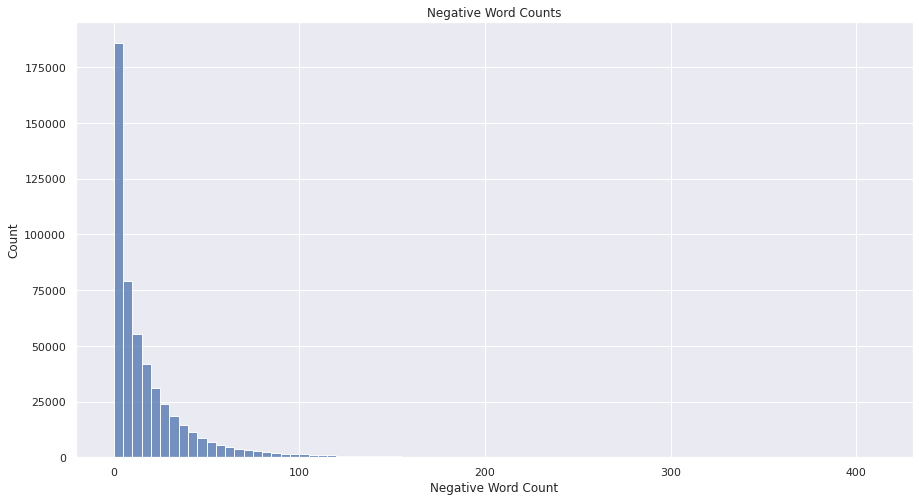

In [ ]:
plt.title('Negative Word Counts')
sns.histplot(data=df, x="Review_Total_Negative_Word_Counts", binwidth=5)
plt.xlabel("Negative Word Count")
plt.ylabel("Count")

**Investigating reviews with 'zero' word counts**

In [ ]:
zero_count = df[df.Review_Total_Negative_Word_Counts == 0]
zero_count[['Negative_Review', 'Review_Total_Negative_Word_Counts']]

,Negative_Review,Review_Total_Negative_Word_Counts
1,No Negative,0
13,No Negative,0
15,No Negative,0
18,No Negative,0
48,No Negative,0
...,...,...
515723,No Negative,0
515724,No Negative,0
515729,No Negative,0
515732,No Negative,0


**Positive Word Counts**

In [ ]:
df.Review_Total_Positive_Word_Counts.describe()

count    515738.000000
mean         17.776458
std          21.804185
min           0.000000
25%           5.000000
50%          11.000000
75%          22.000000
max         395.000000
Name: Review_Total_Positive_Word_Counts, dtype: float64

Text(0, 0.5, 'Count')

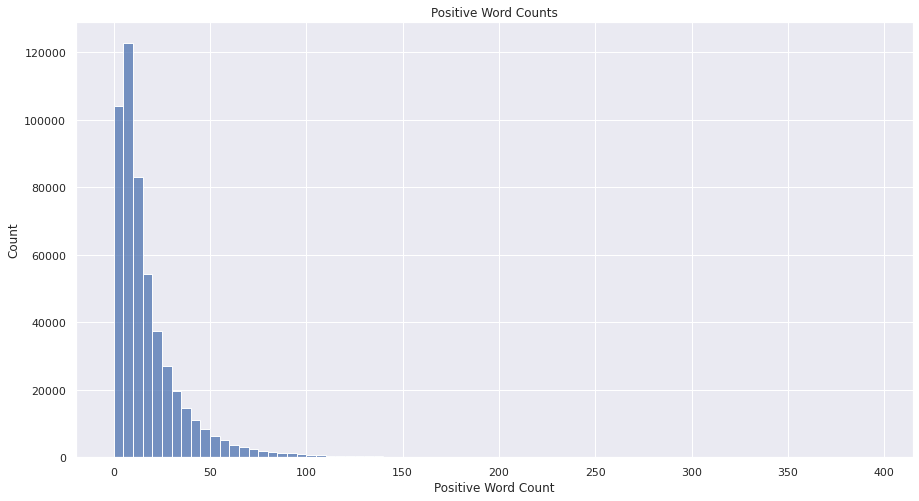

In [ ]:
plt.title('Positive Word Counts')
sns.histplot(data=df, x="Review_Total_Positive_Word_Counts", binwidth=5)
plt.xlabel("Positive Word Count")
plt.ylabel("Count")

**Investigating reviews with 'zero' word counts** 

In [ ]:
zero_count = df[df.Review_Total_Positive_Word_Counts == 0]
zero_count[['Positive_Review', 'Review_Total_Positive_Word_Counts']]

,Positive_Review,Review_Total_Positive_Word_Counts
8,No Positive,0
32,No Positive,0
98,No Positive,0
121,No Positive,0
134,No Positive,0
...,...,...
515666,No Positive,0
515688,No Positive,0
515695,No Positive,0
515700,No Positive,0


**Observation:**

By observing both the positive and negative reviews length, it shows that the mean **(Average Review length) is around 17-18 tokens**. 

**Number of Reviews Reviewer has given**

Text(0.5, 1.0, 'Total number of Reviews Reviewer has Given')

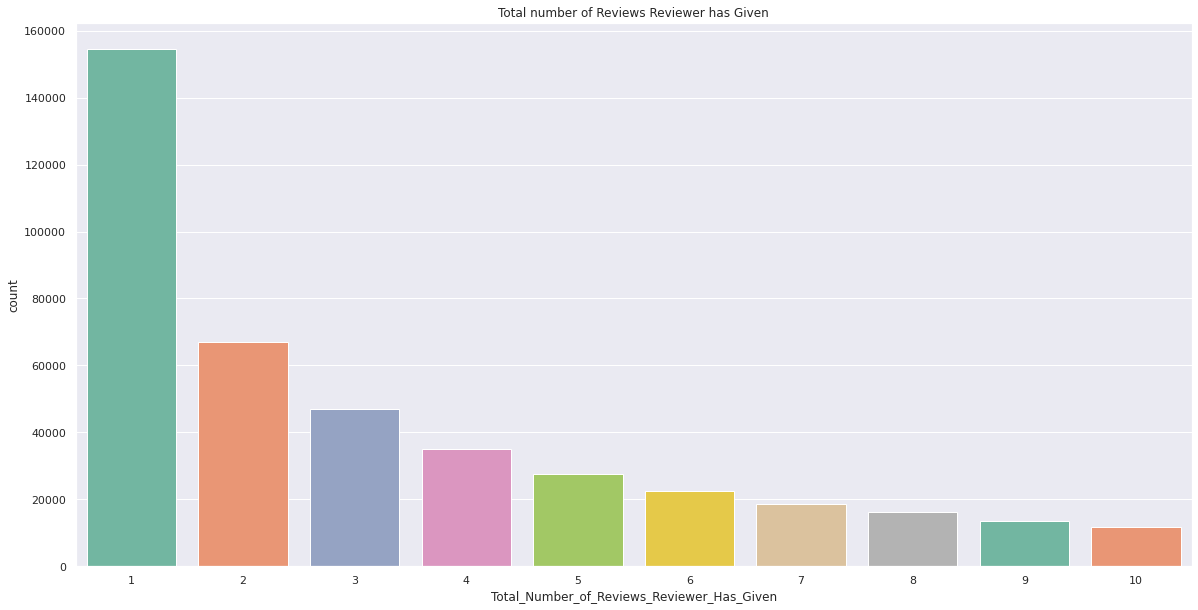

In [ ]:
# Plot Number of Reviews Reviewer has given

ax = sns.countplot(x='Total_Number_of_Reviews_Reviewer_Has_Given', data=df, palette = 'Set2', order=pd.value_counts(df['Total_Number_of_Reviews_Reviewer_Has_Given']).iloc[:10].index)
plt.title('Total number of Reviews Reviewer has Given')

In [ ]:
# Number of Reviews Reviewer has given
df_reviewer_count = df.Total_Number_of_Reviews_Reviewer_Has_Given.value_counts()[:10]
df_reviewer_count

1     154640
2      67077
3      46845
4      35026
5      27629
6      22621
7      18614
8      16150
9      13545
10     11717
Name: Total_Number_of_Reviews_Reviewer_Has_Given, dtype: int64

**Top 10 Most Reviewed Hotels**

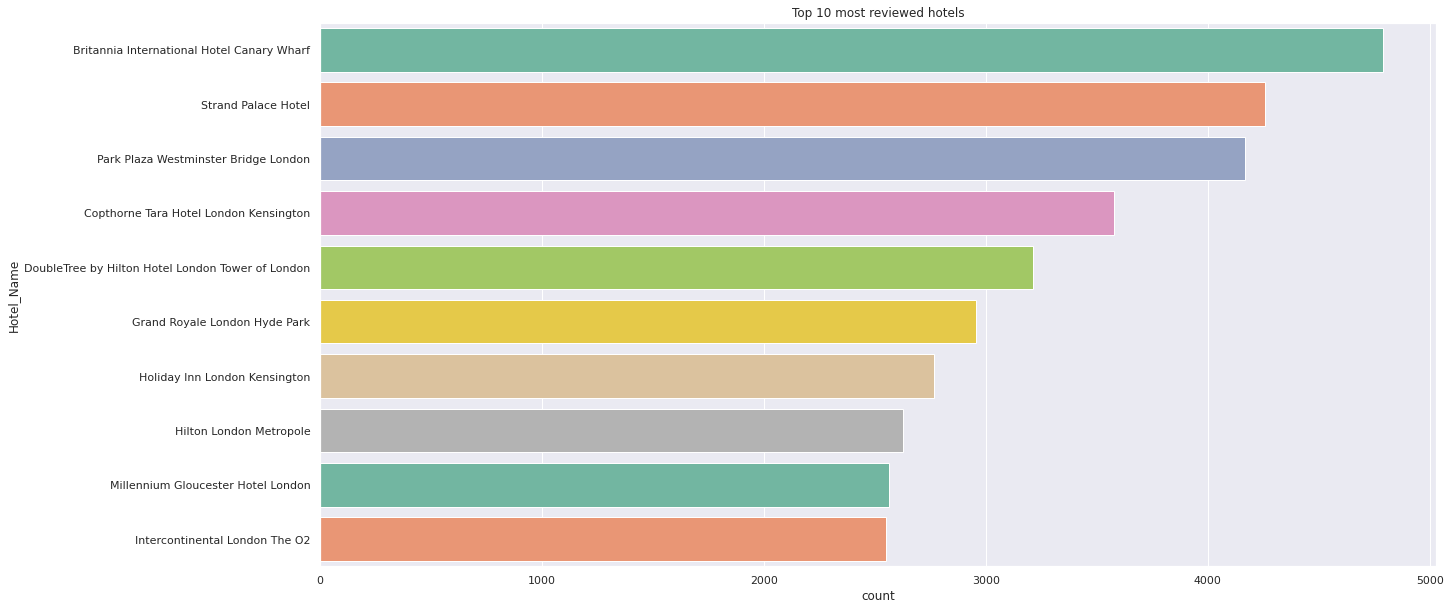

In [ ]:
# Top 10 Most Reviewed Hotels

ax = sns.countplot(y='Hotel_Name', data=df, palette = 'Set2',order=pd.value_counts(df['Hotel_Name']).iloc[:10].index)
plt.title('Top 10 most reviewed hotels')
sns.set(rc = {'figure.figsize':(20,10)})

**Hotel Scores (Descending order)**

In [ ]:
# Top 10 hotels based on Average Score

# Remove duplicated hotel names
hotel_no_dup = df.drop_duplicates(subset=['Hotel_Name'])

hotel_top_score = hotel_no_dup.groupby('Hotel_Name')[['Average_Score']].mean().sort_values("Average_Score", ascending = False)
hotel_top_score

,Average_Score
Hotel_Name,
Ritz Paris,9.8
41,9.6
H tel de La Tamise Esprit de France,9.6
Haymarket Hotel,9.6
Hotel The Serras,9.6
...,...
The Tophams Hotel,6.6
Best Western Maitrise Hotel Edgware Road,6.6
Hotel Cavendish,6.4


**Reviewer Nationality information**

In [ ]:
df.Reviewer_Nationality.describe()

count               515738
unique                 227
top        United Kingdom 
freq                245246
Name: Reviewer_Nationality, dtype: object

**Observation:**

1.   There are a total of 227 different reviewer nationalities. 
2.   Close to half (48%) of the reviewers are coming United Kingdom.

**Top 10 most reviews given based on Reviewer Nationality**

Text(0.5, 1.0, 'Top 10 most reviews given based on reviewer nationality')

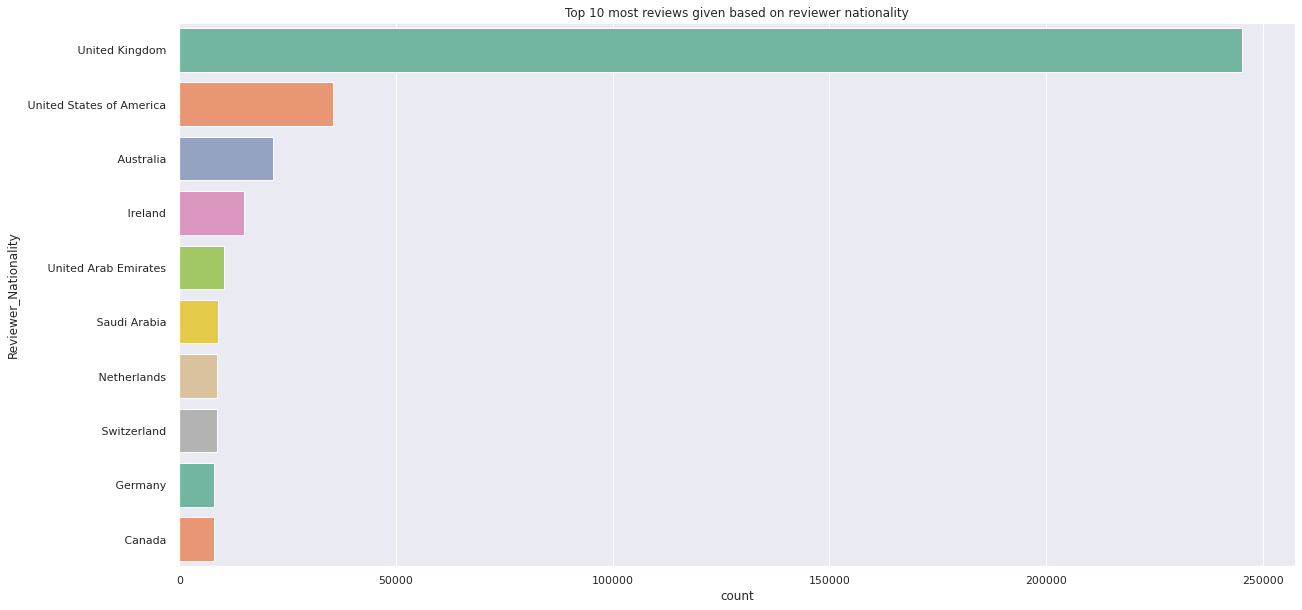

In [ ]:
# Top 10 most reviews given based on eviewer nationality

ax = sns.countplot(y='Reviewer_Nationality', data=df, palette = 'Set2',order=pd.value_counts(df['Reviewer_Nationality']).iloc[:10].index)
plt.title('Top 10 most reviews given based on reviewer nationality')

In [ ]:
# Top 10 most reviews given based on reviewer nationality
df.Reviewer_Nationality.value_counts()[:10]

 United Kingdom               245246
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
 Saudi Arabia                   8951
 Netherlands                    8772
 Switzerland                    8678
 Germany                        7941
 Canada                         7894
Name: Reviewer_Nationality, dtype: int64

**Bottom 20 least reviews given based on Reviewer Nationality**


Text(0.5, 1.0, 'Top 20 least reviews given based on reviewer nationality')

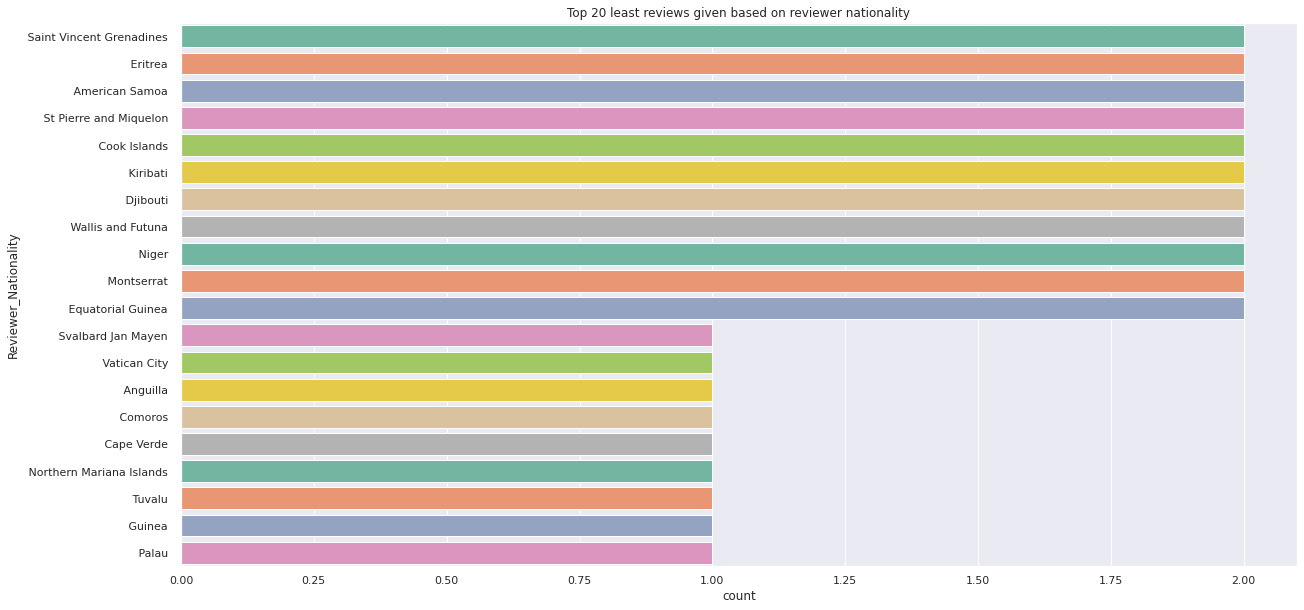

In [ ]:
# Bottom 20 least reviews given based on reviewer nationality

ax = sns.countplot(y='Reviewer_Nationality', data=df, palette = 'Set2',order=pd.value_counts(df['Reviewer_Nationality']).iloc[-20:].index)
plt.title('Top 20 least reviews given based on reviewer nationality')

## **Data Cleaning**
(Remove duplicated records, missing values, convert data format, remove unwanted information, etc.)

### **Treating Duplicated Records**

**Check for duplicated records**

In [ ]:
duplicated = df.duplicated().sum()
print(f'There are {duplicated} duplicated rows.')

There are 526 duplicated rows.


**Drop duplicated records**

In [ ]:
df2 = df.drop_duplicates()

#Display updated rows and columns
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns after duplication removal.')

There are 515212 rows and 17 columns after duplication removal.


### **Treating missing values**

**Check for missing values**

In [ ]:
# check for missing values

df2.isna().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

**Observation:**

There are **missing values for #15 (lat) & #16 (lng)**. 

Let's dig deeper into it and decide on whether we shall impute the missing values / remove them.

**Closer look into missing values**


In [ ]:
nans = lambda df: df[df.isnull().any(axis=1)]
nans_df = nans(df)
nans_df = nans_df[['Hotel_Name','lat','lng']]
missing = len(nans_df)
print(f'No of missing values in the dataset: {missing}')

No of missing values in the dataset: 3268


**Information about missing values**

In [ ]:
nans_df.Hotel_Name.describe()

count                                    3268
unique                                     17
top       Fleming s Selection Hotel Wien City
freq                                      658
Name: Hotel_Name, dtype: object

**Names of hotels with missing values**

In [ ]:
nans_df.Hotel_Name.unique()

array(['Mercure Paris Gare Montparnasse', 'Holiday Inn Paris Montmartre',
       'Maison Albar Hotel Paris Op ra Diamond',
       'NH Collection Barcelona Podium', 'City Hotel Deutschmeister',
       'Hotel Park Villa', 'Fleming s Selection Hotel Wien City',
       'Cordial Theaterhotel Wien', 'Hotel Daniel Vienna', 'Roomz Vienna',
       'Renaissance Barcelona Hotel',
       'Austria Trend Hotel Schloss Wilhelminenberg Wien',
       'Hotel Advance', 'Derag Livinghotel Kaiser Franz Joseph Vienna',
       'Hotel City Central', 'Hotel Pension Baron am Schottentor',
       'Hotel Atlanta'], dtype=object)

**Observation:**

1. We observe that there are 3268 Nan (missing values) from 17 Hotels. 

2. (lat,lng) information is not available for these 17 Hotels (1.13% of the dataset).

3. The hotel named 'Fleming s Selection Hotel Wien City' had the most missing values, with a frequency of 658.

**Manual filling in of latitude & longitude for the 17 Hotels (based on GPS coordinates)**

References: 

https://www.gps-coordinates.net/

https://www.latlong.net/

In [ ]:
#latitude information of Hotels
loc_lat = {'Fleming s Selection Hotel Wien City':48.209270,
       'Hotel City Central':48.2136,
       'Hotel Atlanta':48.210033,
       'Maison Albar Hotel Paris Op ra Diamond':48.875343,
       'Hotel Daniel Vienna':48.1888,
       'Hotel Pension Baron am Schottentor':48.216701,
      'Austria Trend Hotel Schloss Wilhelminenberg Wien':48.2195,
      'Derag Livinghotel Kaiser Franz Joseph Vienna':48.245998,
      'NH Collection Barcelona Podium':41.3916,
      'City Hotel Deutschmeister':48.22088,
      'Hotel Park Villa':48.233577,
      'Cordial Theaterhotel Wien':48.209488,
      'Holiday Inn Paris Montmartre':48.888920,
      'Roomz Vienna':48.186605,
      'Mercure Paris Gare Montparnasse':48.840012,
      'Renaissance Barcelona Hotel':41.392673,
      'Hotel Advance':41.383308}

# longitude information of Hotels
loc_lng ={'Fleming s Selection Hotel Wien City':16.353479,
       'Hotel City Central':16.3799,
       'Hotel Atlanta':16.363449,
       'Maison Albar Hotel Paris Op ra Diamond':2.323358,
       'Hotel Daniel Vienna':16.3840,
       'Hotel Pension Baron am Schottentor':16.359819,
      'Austria Trend Hotel Schloss Wilhelminenberg Wien':16.2856,
      'Derag Livinghotel Kaiser Franz Joseph Vienna':16.341080,
      'NH Collection Barcelona Podium':2.1779,
      'City Hotel Deutschmeister':16.36663,
      'Hotel Park Villa':16.345682,
      'Cordial Theaterhotel Wien':16.351585,
      'Holiday Inn Paris Montmartre':2.333087,
      'Roomz Vienna':16.420643,
      'Mercure Paris Gare Montparnasse':2.323595,
      'Renaissance Barcelona Hotel':2.167494,
      'Hotel Advance':2.162828}

**Fill the lat & lng coordinates**

In [ ]:
df3 = df2.copy()

# fill the latitude information
df3['lat'] = df2['lat'].fillna(df2['Hotel_Name'].apply(lambda x: loc_lat.get(x)))

# fill the longitude information
df3['lng'] = df2['lng'].fillna(df2['Hotel_Name'].apply(lambda x: loc_lng.get(x)))

**Double Check if missing values still exist**

In [ ]:
# Double check if any missing values still exists 
df3.isnull().sum()

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
dtype: int64

Now, we have checked that there are no more duplicated records or missing values. 

We will be performing some data cleansing & initial data explorations in the next steps to get a better understanding of the dataset.

### **Review_Date (Data format conversion)**

**Discover original Review_Date format**

In [ ]:
df3.Review_Date.describe()

count       515212
unique         731
top       8/2/2017
freq          2584
Name: Review_Date, dtype: object

**Observation:**

1. In the dataset, the reviews scraped are spread across 731 different days.
2. 2584 reviews were made on 8/2/2017.

**Convert Review_Date datatype of 'object' to 'datetime'**

In [ ]:
# Convert Review_Date datatype of 'object' to 'datetime'
df3['Review_Date'] = pd.to_datetime(df3['Review_Date'], dayfirst = True)

**Check new Review_Date format**

In [ ]:
df3.dtypes

Hotel_Address                                         object
Additional_Number_of_Scoring                           int64
Review_Date                                   datetime64[ns]
Average_Score                                        float64
Hotel_Name                                            object
Reviewer_Nationality                                  object
Negative_Review                                       object
Review_Total_Negative_Word_Counts                      int64
Total_Number_of_Reviews                                int64
Positive_Review                                       object
Review_Total_Positive_Word_Counts                      int64
Total_Number_of_Reviews_Reviewer_Has_Given             int64
Reviewer_Score                                       float64
Tags                                                  object
days_since_review                                     object
lat                                                  float64
lng                     

**Create new columns 'Year' & 'Month'**

In [ ]:
df3['Year'], df3['Month'] = df3['Review_Date'].apply(lambda x: x.year), df3['Review_Date'].apply(lambda x: x.month)

**Barplot of 'Year'**

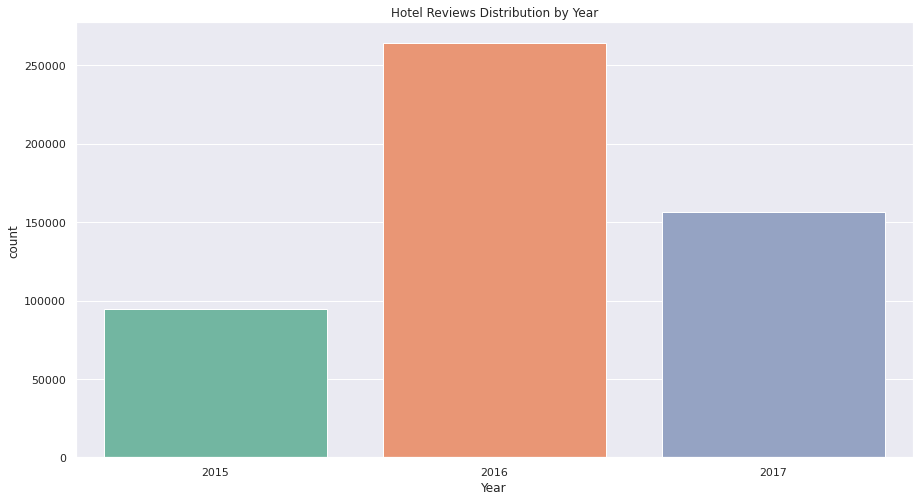

In [ ]:
ax = sns.countplot(x="Year", data=df3, palette = 'Set2')
plt.title('Hotel Reviews Distribution by Year')
sns.set(rc = {'figure.figsize':(15,8)})

In [ ]:
df3['Year'].value_counts(normalize=True)

2016    0.512707
2017    0.304110
2015    0.183183
Name: Year, dtype: float64

**Obervation:** 

Over half of the reviews scraped were reviews made on 2016.  

**Barplot of 'Month' by 'Year'**

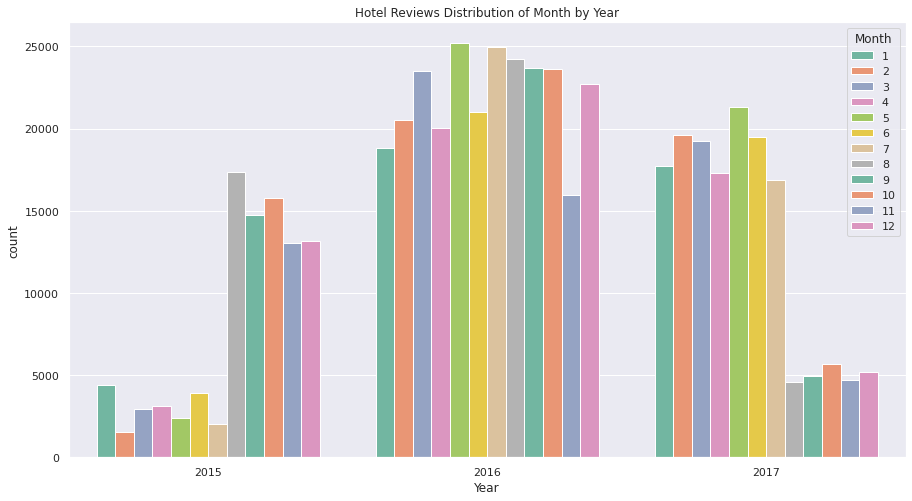

In [ ]:
ax = sns.countplot(x="Year", hue="Month", data=df3, palette = 'Set2')
plt.title('Hotel Reviews Distribution of Month by Year')
sns.set(rc = {'figure.figsize':(15,8)})

**Observation:**

1. The reviews scraped are spread over different months in the year. 

2. According to the barplot, there were least number of reviews scraped during the first half of year 2015, and the second half of year 2017. 

3. Year 2016 had the highest number of reviews being scraped.

### **Extract Hotel Country and City from Hotel Address**

**Check for number of unique hotels**

In [ ]:
df3['Hotel_Address'].nunique()

1493

**Observation:**

Based on the Hotel Address information, there are 1493 hotels that exist in the dataset.

**Display sample Hotel Address**

In [ ]:
# Display sample Hotel Address
pd.set_option('display.max_colwidth', None)
df['Hotel_Address'].sample(10) 

409125              Piazza Luigi di Savoia 20 Central Station 20124 Milan Italy
418144                 Poultry 27 City of London London EC2R 8AJ United Kingdom
191356    44 Grosvenor Square Westminster Borough London W1K 2HP United Kingdom
109541            22 Hertsmere Road Tower Hamlets London E14 4ED United Kingdom
113944        225 Edgware Road Westminster Borough London W2 1JU United Kingdom
304981                    Corso Sempione 69 Fiera Milano City 20149 Milan Italy
465080                       Taborstra e 12 02 Leopoldstadt 1020 Vienna Austria
165281            372 Strand Westminster Borough London WC2R 0JJ United Kingdom
320011            Europaboulevard 10 Zuideramstel 1083 AD Amsterdam Netherlands
241334           71 79 Southwark Street Southwark London SE1 0JA United Kingdom
Name: Hotel_Address, dtype: object

Since we do not have the hotel city and country information, We can attempt to extract City and Country information from our addresses.

**Label the Hotel's 'Country' & 'City' based on Hotel Addresses**

In [ ]:
# Create a new column called 'Hotel_Country'
# Splitting the hotel address and picking out the last string which would be the countries
country = df3.Hotel_Address.apply(lambda x: x.split(' ')[-1]) 

df3.insert(loc = 0,
          column = 'Hotel_Country',
           value = country)

# Replacing 'United Kingdom' with 'UK' for easy use
df3.Hotel_Country = df3.Hotel_Country.str.replace('Kingdom','UK') 

# Create a new column called 'City'
# Splitting the hotel address and picking out the second last string which would be the countries
city = df3.Hotel_Address.apply(lambda x: x.split(' ')[-2]) 

df3.insert(loc = 1,
          column = 'Hotel_City',
          value = city)

# Replace the string 'United' as 'London'
df3.Hotel_City = df3.Hotel_City.str.replace('United','London') 

**Display dataframe with 'Hotel_Country' and 'Hotel_City' labelled**

In [ ]:
# Check the new columns
df3.loc[:, ["Hotel_Address", "Hotel_Country", "Hotel_City"]]

,Hotel_Address,Hotel_Country,Hotel_City
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,Netherlands,Amsterdam
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,Netherlands,Amsterdam
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,Netherlands,Amsterdam
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,Netherlands,Amsterdam
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,Netherlands,Amsterdam
...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 Vienna Austria,Austria,Vienna
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 Vienna Austria,Austria,Vienna
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 Vienna Austria,Austria,Vienna
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 Vienna Austria,Austria,Vienna


**Plotting the hotel distribution (Countries)**

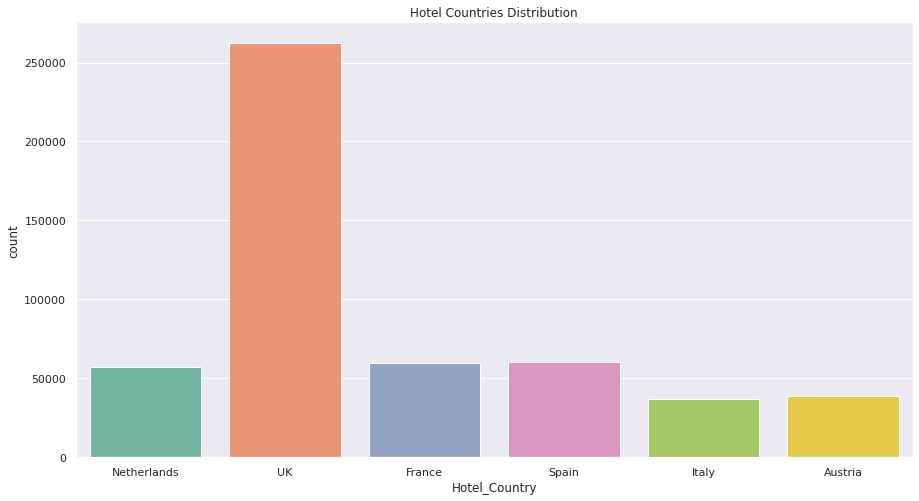

In [ ]:
ax = sns.countplot(x="Hotel_Country", data=df3, palette = 'Set2')
plt.title('Hotel Countries Distribution')
sns.set(rc = {'figure.figsize':(15,8)})

**Plotting the hotel distribution (Cities)**

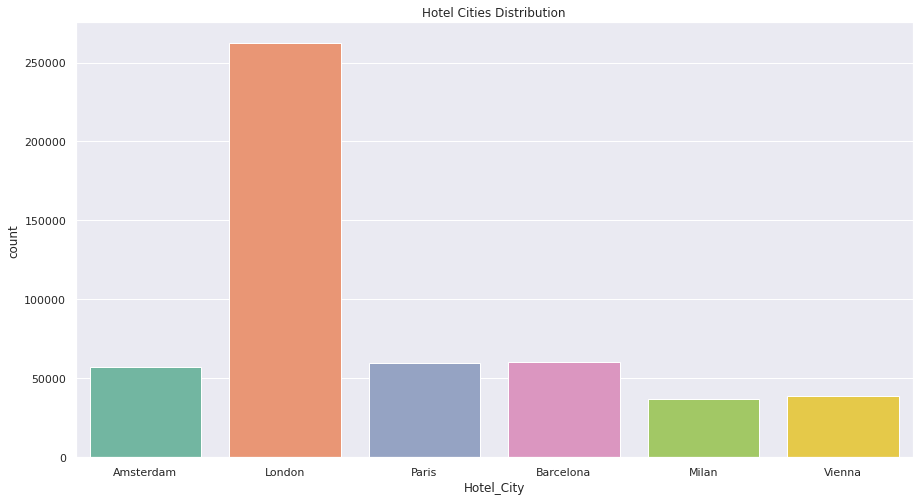

In [ ]:
ax = sns.countplot(x="Hotel_City", data=df3, palette = 'Set2')
plt.title('Hotel Cities Distribution')
sns.set(rc = {'figure.figsize':(15,8)})

**Observation:**

- In this dataset, it is found that hotels are distributed over 6 European countries, which are United Kingdom, Spain, France, Netherlands, Austria and Italy.
- Similarly, it is found that hotels are distributed over 6 European cities, which are London, Barcelona, Paris, Amsterdam, Vienna and Milan.
- Hotels in London,United Kingdom where found to be the most distributed in the dataset, with over 250, 000 records.

### **Extract useful information from Hotel Tags**

**Display Hotel Tags**

In [ ]:
pd.set_option('display.max_colwidth', None)
df3[['Tags']]

,Tags
0,"[' Leisure trip ', ' Couple ', ' Duplex Double Room ', ' Stayed 6 nights ']"
1,"[' Leisure trip ', ' Couple ', ' Duplex Double Room ', ' Stayed 4 nights ']"
2,"[' Leisure trip ', ' Family with young children ', ' Duplex Double Room ', ' Stayed 3 nights ', ' Submitted from a mobile device ']"
3,"[' Leisure trip ', ' Solo traveler ', ' Duplex Double Room ', ' Stayed 3 nights ']"
4,"[' Leisure trip ', ' Couple ', ' Suite ', ' Stayed 2 nights ', ' Submitted from a mobile device ']"
...,...
515733,"[' Leisure trip ', ' Family with older children ', ' 2 rooms ', ' Stayed 5 nights ']"
515734,"[' Leisure trip ', ' Family with young children ', ' Standard Triple Room ', ' Stayed 2 nights ']"
515735,"[' Leisure trip ', ' Family with older children ', ' 2 rooms ', ' Stayed 4 nights ', ' Submitted from a mobile device ']"
515736,"[' Leisure trip ', ' Group ', ' Standard Triple Room ', ' Stayed 3 nights ']"


**Observation:**

Observing the column 'Tags', we may be able to extract useful information such as trip type, days of stay, visitor type, room type from it, and display the information in easier-to-understand visualisations.

**Extracting Trip type**

In [ ]:
df3['Leisure'] = df3['Tags'].map(lambda x: 1 if ' Leisure trip ' in x else 0)
df3['Business'] = df3['Tags'].map(lambda x: 2 if ' Business trip ' in x else 0)
df3['Trip_type'] = df3['Leisure'] + df3['Business']

df3['Trip_type'] = df3['Trip_type'].map({0:'Others', 1:'Leisure', 2:'Business'}) 

# drop unneeded columns
df3 = df3.drop(['Leisure', 'Business'], axis=1)

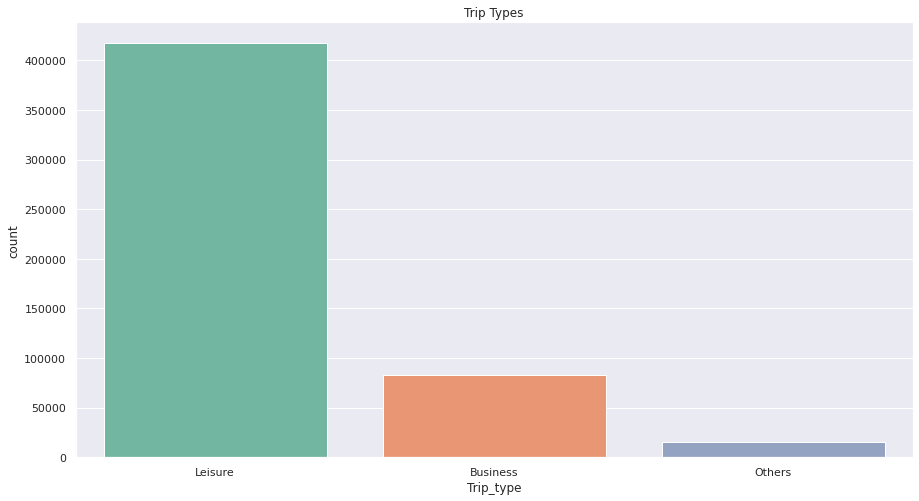

In [ ]:
# Plotting the trip type

ax = sns.countplot(x="Trip_type", data=df3, palette = 'Set2')
plt.title('Trip Types')
sns.set(rc = {'figure.figsize':(15,8)})

In [ ]:
df3.Trip_type.value_counts(normalize=True)

Leisure     0.810065
Business    0.160813
Others      0.029122
Name: Trip_type, dtype: float64

**Observation:**

1. We observe that there are 3 trip types that the reviews are based on. 
2. Over 80% of the trip types are labelled as 'Leisure'.
3. About 15% of trip types are labelled as 'Business'.
4. Less than 3% of the trip types were not labelled, hence, they will be labelled as 'Others'.

**Extracting Trip visitor type**

In [ ]:
df3['Couple'] = df3['Tags'].map(lambda x: 1 if ' Couple ' in x else 0)
df3['Family'] = df3['Tags'].map(lambda x: 2 if ' Family with ' in x else 0)
df3['Solo'] = df3['Tags'].map(lambda x: 3 if ' Solo ' in x else 0)
df3['Group'] = df3['Tags'].map(lambda x: 4 if ' Group ' in x or ' friends ' in x else 0)
df3['Trip_visitor_type'] = df3['Couple'] + df3['Family'] + df3['Solo'] + df3['Group']

df3['Trip_visitor_type'] = df3['Trip_visitor_type'].map({1:'Couple', 2:'Family', 3:'Solo', 4:'Group'}) 

# drop unneeded columns
df3 = df3.drop(['Couple', 'Family', 'Solo', 'Group'], axis=1)

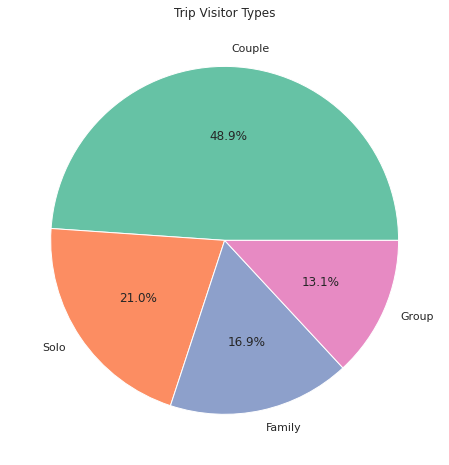

In [ ]:
# define data
data = df3.Trip_visitor_type.value_counts()
labels = data.index

# define Seaborn color palette to use
colors = sns.color_palette('Set2')[0:4]

# create pie chart
plt.title('Trip Visitor Types')
plt.pie(data, labels = labels, colors = colors, autopct='%1.1f%%')
plt.show()

In [ ]:
df3.Trip_visitor_type.value_counts()

Couple    252005
Solo      108431
Family     87295
Group      67481
Name: Trip_visitor_type, dtype: int64

**Observation:**

Close to 50% of the trip visitor type were couple, while 21% were solo, 17% family and 13% group. 

**Extracting Days of stay**


In [ ]:
df3['1_night'] = df3['Tags'].map(lambda x: 1 if ' Stayed 1 night ' in x else 0)
df3['2_nights'] = df3['Tags'].map(lambda x: 2 if ' Stayed 2 nights ' in x else 0)
df3['3_nights'] = df3['Tags'].map(lambda x: 3 if ' Stayed 3 nights ' in x else 0)
df3['4_nights_or_more'] = df3['Tags'].map(lambda x: 0 if ' Stayed 1 night ' in x  or ' Stayed 2 nights ' in x or ' Stayed 3 nights ' in x else 4)
df3['Trip_days_of_stay'] = df3['1_night'] + df3['2_nights'] + df3['3_nights'] + df3['4_nights_or_more'] 

df3['Trip_days_of_stay'] = df3['Trip_days_of_stay'].map({1:'1 night', 2:'2 nights', 3:'3 nights', 4:'4 or more nights'}) 
df3 = df3.drop(['1_night', '2_nights', '3_nights', '4_nights_or_more' ], axis=1)

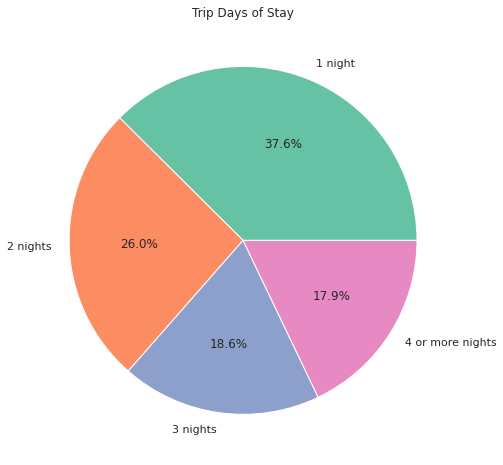

In [ ]:
# # Plotting the days of stay
data = df3.Trip_days_of_stay.value_counts()
labels = data.index

# define Seaborn color palette to use
colors = sns.color_palette('Set2')[0:4]

# create pie chart
plt.title('Trip Days of Stay')
plt.pie(data, labels = labels, colors = colors, autopct='%1.1f%%')
plt.show()

In [ ]:
df3.Trip_days_of_stay.value_counts()

1 night             193497
2 nights            133809
3 nights             95706
4 or more nights     92200
Name: Trip_days_of_stay, dtype: int64

**Observation:**

1 night of stay were most accounted from the dataset (38%), while 26% were 2 nights, 19% were 3 nights and 18% were 4 or more nights.

## **Further Data Exploration (Post-cleaning)**

**Hotel Average Reviewer Scores Distribution (Rounded)**

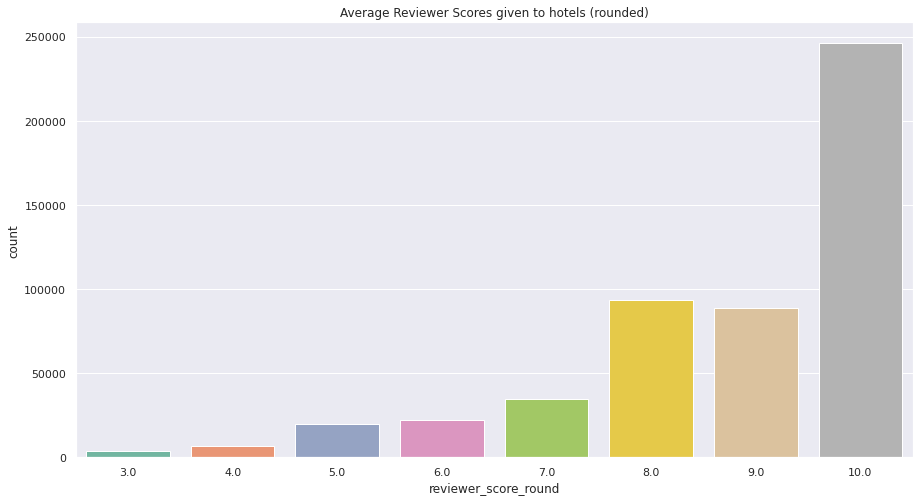

In [ ]:
df3['reviewer_score_round'] = df3['Reviewer_Score'].apply(np.ceil)

ax = sns.countplot(x='reviewer_score_round', data=df3, palette = 'Set2')
plt.title('Average Reviewer Scores given to hotels (rounded)')
sns.set(rc = {'figure.figsize':(15,8)})

**Observation:**

1. Upon rounding the Reviewer scores, we identify that most of the reviewers have given high reviews (8.0 - 10.0 marks). However, there are also quite many that has given 7.0 marks and below. Extreme cases have even given 3.0 & 4.0 marks. 

2. We will be investigating further as to who has given these low scores and what are the context of reviews that resulted the reviewer to give such a low rating.

**Dig Deeper into reviews that received low scores (3.0 and below)**

In [ ]:
low_scores = df3[(df3.Reviewer_Score <= 3.0)]
low_scores[['Hotel_Name', 'Hotel_Country', 'Positive_Review', 'Negative_Review', 'Reviewer_Nationality', 'Reviewer_Score']].sample(10)

,Hotel_Name,Hotel_Country,Positive_Review,Negative_Review,Reviewer_Nationality,Reviewer_Score
22692,W London Leicester Square,UK,Great location lovely buzz and atmosphere on saturday evening Loved the club in the hotel and the spa as a relaxing day on the sunday Staff were really helpful and friendly,couldn t fault it,United Kingdom,2.5
498555,NH Carlton Amsterdam,Netherlands,Nothing,Old dated Room was damp,United Kingdom,2.5
154845,Novotel Paris 17,France,Its close to the city and is in Paris,I liked nothing in the hotel expect the proximity to the city Staff is arrogant food is not Continental Its not so kids friendly cramped rooms toilet facility is not good I would never ever stay is Novotel,France,2.9
141707,Blakemore Hyde Park,UK,Nothing nothing at all,The service the staff hs difficulty in understanding proper english the rooms lack many items weight scale slippers etc Breakfast not that fresh Gym had maintenance nobody had even put a sign post or a notice to inform us of that i went to workout and found it closed then asked the front desk about it Definitely not a 4 star hotel,Lebanon,2.9
190895,Millennium Hotel London Mayfair,UK,No Positive,The room is too small no sound proof too noisy Drinking water is not available One of the worst hotels I have ever stayed in,Switzerland,2.5
28039,The Park Tower Knightsbridge a Luxury Collection Hotel,UK,No Positive,Worst hotel,United Kingdom,2.5
66201,Britannia International Hotel Canary Wharf,UK,Horrible,Bed Brocken toilet it smells internet is ridiculous,United Kingdom,2.9
108208,Novotel Suites Paris Montreuil Vincennes,France,Nothing,All,Chile,2.5
276512,Barcelona Princess,Spain,The view was nice,Not clean noisy staff is unprofessional,Israel,2.9
407486,Hotel Mozart,Italy,Worst hotel ever nothing to like They stole money from me,Every thing,Saudi Arabia,2.5


**Observation:**

Upon observing a few samples of reviews that received low ratings, we discover that these reviews typically have longer textual reviews for the 'Negative Review' column. 

On the other hand, most but not all, had relatively short textual reviews for the 'Positive Review' column. 

**Correlation between Total Positive Word Counts, Total Negative Word Counts, and Reviewer Score**

In [ ]:
# Find the correlation
corr = df3[['Review_Total_Positive_Word_Counts', 'Review_Total_Negative_Word_Counts', 'Reviewer_Score']].corr()
corr.style.background_gradient(cmap= 'coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  This is separate from the ipykernel package so we can avoid doing imports until


,Review_Total_Positive_Word_Counts,Review_Total_Negative_Word_Counts,Reviewer_Score
Review_Total_Positive_Word_Counts,1.00,0.12,0.22
Review_Total_Negative_Word_Counts,0.12,1.00,-0.38
Reviewer_Score,0.22,-0.38,1.00


**Observation:**

1. The correlation between Reviewer Score and Total Negative Word Counts is -0.38. This indicates there is a weak negative correlation between these two variables, meaning that there is an inverse relationship (As Reviewer Score increases, Total Negative Word Counts reduces).

1. The correlation between Reviewer Score and Total Positive Word Counts is 0.22. This indicates there is a weak positive correlation between these two variables, meaning that there is a positive relationship (As Reviewer Score increases, Total Positive Word Counts increases).


**Reviewer Score by Review Dates**

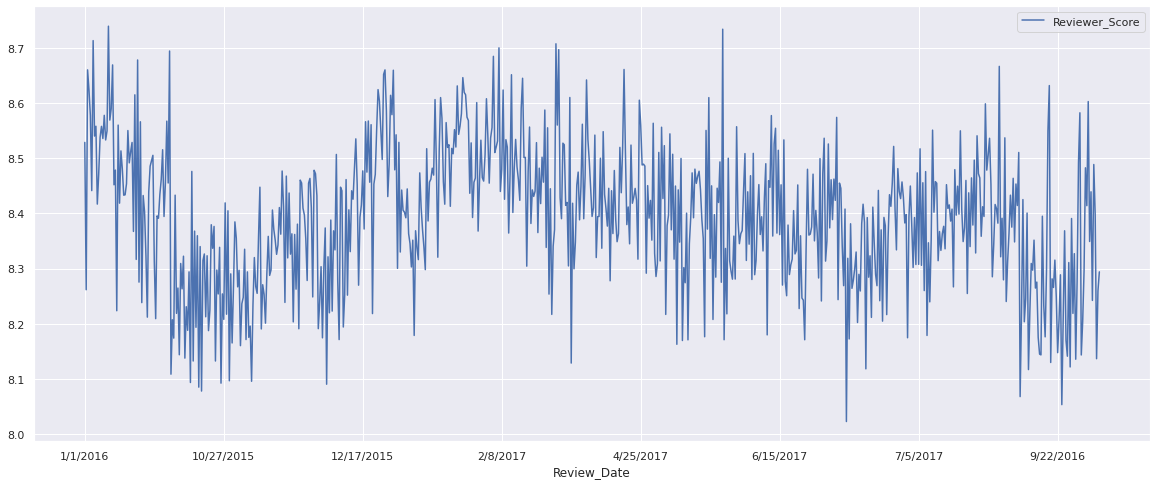

In [ ]:
df[["Review_Date","Reviewer_Score"]].groupby("Review_Date").mean().plot(figsize=(20,8))

**Observation:**

We want to identify if there is a time or seasonal trend in the review scores.

Looking at the time and month trend, there is indeed slight differences of the scores in different time periods of the year. This may be due to the differences in price, due to on/off season rates a hotel will charge. In turn, the guests may either expect more (more money spent might be higher expectations) or will attract a different category of guests to book the hotel. 

Unfortunately, this dataset did not provide us the hotel prices, as linking this dataset with the prices would be very interesting.

**Top 10 highest rated hotels based on average scores and number of reviews given**

In [ ]:
df3[df3.Average_Score >= 8.8][['Hotel_Name','Hotel_Country','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Total_Number_of_Reviews',ascending = False)[:10]

,Hotel_Name,Hotel_Country,Average_Score,Total_Number_of_Reviews
404728,Glam Milano,Italy,8.8,7371
309843,Jaz Amsterdam,Netherlands,8.9,7108
327773,Ayre Hotel Gran V a,Spain,8.8,4887
57597,M by Montcalm Shoreditch London Tech City,UK,9.1,4802
450210,Hotel Esther a,Netherlands,9.1,4687
180550,citizenM Tower of London,UK,9.1,4672
370315,25hours Hotel beim MuseumsQuartier,Austria,8.8,4324
361190,Hilton London Wembley,UK,8.8,4305
14829,Intercontinental London The O2,UK,9.4,4204
470003,The Square Milano Duomo,Italy,9.0,4192


**Observation:**

The Overall Top 10 Hotels in the reviews dataset should not only be based solely on its Average Score, but also based on the total number of reviews it has received. 

**Average scores by Countries**

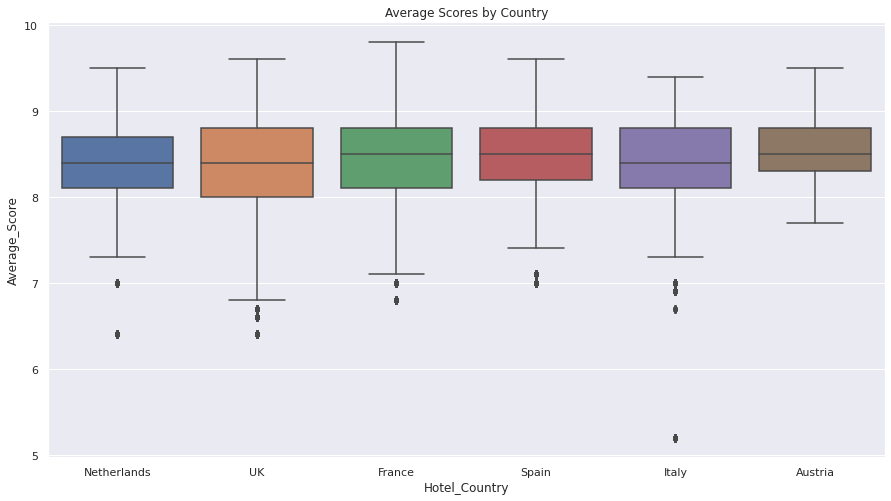

In [ ]:
sns.set_style("whitegrid")
sns.set(font_scale = 1)
plt.title("Average Scores by Country")
sns.boxplot(x = 'Hotel_Country', y = 'Average_Score', data = df3)

**Observation:**

1. Median (Q2/50th Percentile): the middle value of the dataset is approximately around 8.5 marks across all country's hotels.

2. First quartile (Q1/25th Percentile): the middle number between the smallest number and the median of the dataset is approximately around 8.0 marks for Netherlands, UK, France, Spain and Italy. The Q1 value for Austria is slightly above 8.0 marks.

3. Third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset, is close to 9.0 marks for all country's hotels.

4. Minimum value is less than 8.0 but more than 7.0 for Netherlands, France, Spain, Italy and Austria, but less than 7.0 for UK.

5. Maximum value is close to 10.0 across all countries.

6. There are outliers for the scores in all countries except for Austria; Italy had an extreme outlier of less than 6.0 marks (Most poorly rated hotel across all hotels)

**Exploring the lowest rated Hotel (lowest Average Score) in the dataset**

In [ ]:
Italy_outlier = df3[(df3.Average_Score < 6.0)]
Italy_outlier[['Hotel_Name', 'Hotel_Country', 'Positive_Review', 'Negative_Review', 'Reviewer_Nationality', 'Reviewer_Score']].sample(10)

,Hotel_Name,Hotel_Country,Positive_Review,Negative_Review,Reviewer_Nationality,Reviewer_Score
494794,Hotel Liberty,Italy,Tram lines,There was no hot water in my room and staff were uninterested in resolving this They just shrugged their shoulders and handed us a jug of hot water for washing Under pressure my room was changed Also there is a bathroom just off the lobby but it has no running water and again a shrug from the staff most unhygenic surely a health and safety matter Also items ran out at breakfast food bowls glasses and it was difficult to get these from the staff,Ireland,3.3
494816,Hotel Liberty,Italy,There is a tram line in front of the hotel but travelling in milano is easy for other parts as well nothing special for this hotel,The room was not clean the bathroom was really dirty so that we needed to tell the staff to clean the bathroom to take a shower which was really not clean in the end The rooms looking at the garden were dark the ones on the road side were really noisy The hotel was with 4 stars which in my opinion not even close to 2 stars You can think of the hotel as a hostel,Turkey,3.3
494837,Hotel Liberty,Italy,No Positive,Poor service from staff impolite and unfriendly,United Kingdom,3.5
494825,Hotel Liberty,Italy,The staff are very friendly and helpful which is the only positive thing about this hotel,It is very dirty It is dangerous for your hygiene I do not know how it is a 4 stars hotel It should be one star The toilet is very dirty the carpets are very dirty They do not have a proper toaster for breakfast,Lebanon,3.8
494824,Hotel Liberty,Italy,Friendly personals Half Retro feeling,Curpet is old Dust is too much because of this It is not good for persons allergic No own parking And near to this hotel there is no parking free of charge on streeets,Germany,4.0
494846,Hotel Liberty,Italy,Breakfast is good Weekday staff is very kind But weekend staff is so so,Shower box is not provided enough water and there is tram noise,United Kingdom,5.8
494801,Hotel Liberty,Italy,Trams passed the front door Attractive foyer Staff spoke English and gave good guidance to how to get around Breakfast waitress was very helpful but the selection of food was limited and breakfast finished at 09 00,Rooms were tired Carpet needed a good clean or replacement Plumbing system outdated Various fittings were missing or knobs had come off There were about 5 lamps that needed replacing The tv remote did not work and request for new batteries did not happen Unfortunately 2 of our party were ill and stayed in their rooms and were disturbed even though we had requested that the rooms were not serviced that day Nothing to do with the hotel but there is a 10 euro per night city tax,United Kingdom,6.3
494845,Hotel Liberty,Italy,No Positive,Very dirty poorly staffed Airconditioners do not work,Malta,4.6
494813,Hotel Liberty,Italy,No Positive,Staff not welcoming at all Bad smell of cigarettes in the reception area and into the room too From outside looked it was close down and the room was very bad cleaned with hair left into the shower I can t believe it still open,United Kingdom,2.9
494853,Hotel Liberty,Italy,No Positive,pas de chaines internationales,France,7.1


In [ ]:
Italy_outlier.Hotel_Name.value_counts()

Hotel Liberty    65
Name: Hotel_Name, dtype: int64

**Observation:**

Upon observation, we identify that 'Hotel Liberty' in Italy has the lowest overall Average Score among all hotels. 

By going through some samples of the hotel's positive and negative reviews, we also discover that many of the reviews given were long negative reviews. In return, a number of 'No Positive' remarks were seen under the 'Positive Reviews' column, indicating that many of the reviewers did not provide a positive review.

**Average Scores by Positive and Negative Review Lengths**

True


Text(0.5, 0, 'Average Score')

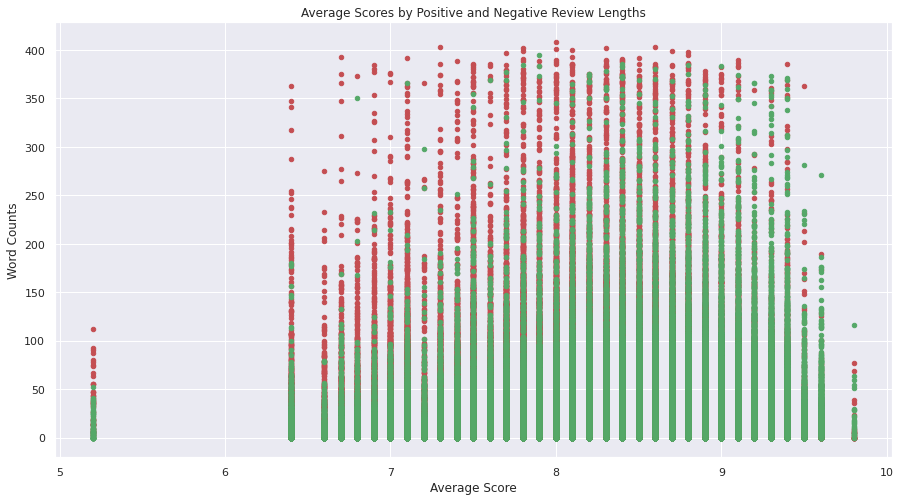

In [ ]:
#plot negative reviews length as red colour
ax1 = df.plot(kind='scatter', x='Average_Score', y='Review_Total_Negative_Word_Counts', color='r')    

#plot positive reviews length as green colour
ax2 = df.plot(kind='scatter', x='Average_Score', y='Review_Total_Positive_Word_Counts', color='g',ax=ax1)    

# check if both plots are merged as one
print(ax1 == ax2)  # True

plt.title('Average Scores by Positive and Negative Review Lengths')
plt.ylabel('Word Counts')
plt.xlabel('Average Score')

**Observation:**

1. Overall, Negative Reviews (red colour) accounts for relatively higher word counts.

2. Positive Reviews (green colour) seems to dominate the scatterplot. (More positive reviews over negative reviews)

3. The higher the Average Score, the lesser the negative reviews (red colour).

**Reviews Count per year by country**

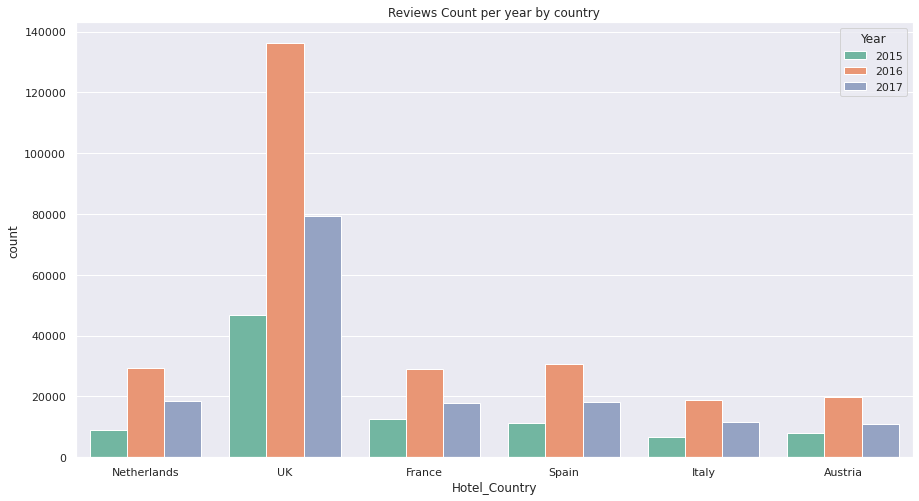

In [ ]:
ax = sns.countplot(x="Hotel_Country", hue="Year", data=df3, palette = 'Set2')
plt.title('Reviews Count per year by country')
sns.set(rc = {'figure.figsize':(15,8)})

**Observation:**

1. UK accounts for majority of the reviews counts in the dataset.
2. Other than UK, all other countries have an almost equal distribution of reviews proportion.
3. Most of the reviews were extracted from year 2016, followed by year 2017, then only year 2015.

**Days of Stay by Trip types**

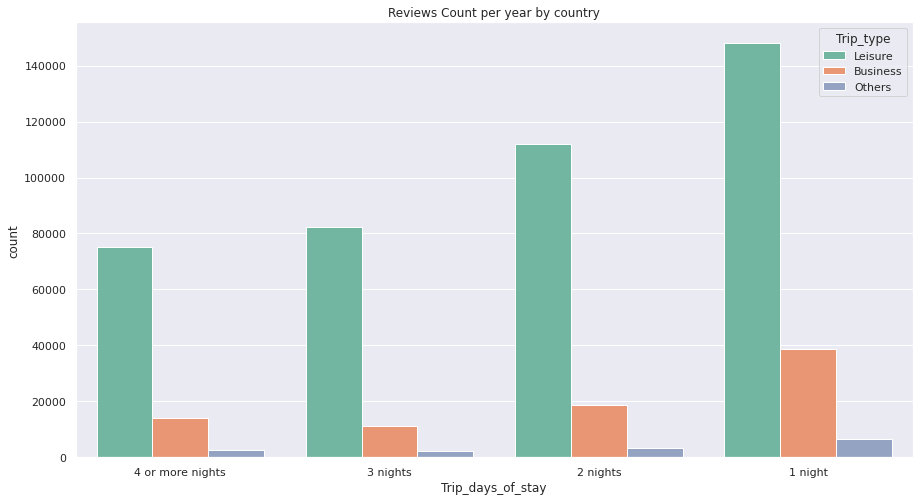

In [ ]:
ax = sns.countplot(x="Trip_days_of_stay", hue="Trip_type", data=df3, palette = 'Set2')
plt.title('Reviews Count per year by country')
sns.set(rc = {'figure.figsize':(15,8)})

**Observation:**

1. Majority of the trip types were tagged as 'Leisure'.
2. Majority of the Business trip types had only 1 day of stay.
3. Leisure trip types have a wide-ranging days of stay. 

**Trip days of stay by visitor type**

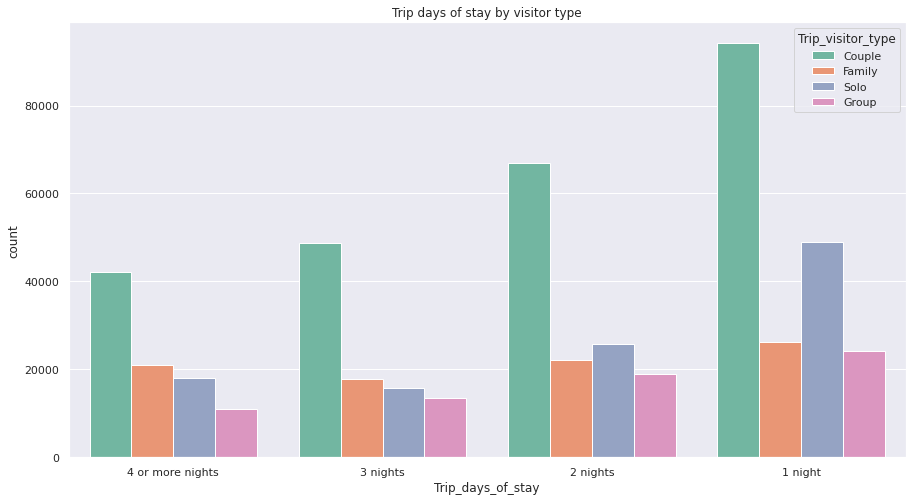

In [ ]:
ax = sns.countplot(x="Trip_days_of_stay", hue="Trip_visitor_type", data=df3, palette = 'Set2')
plt.title('Trip days of stay by visitor type')
sns.set(rc = {'figure.figsize':(15,8)})

**Observation:**

1. Couple trips, Solo trips and Group trips have a higher percentage of staying for 1 night.
2. Family trips have equal percentage of all days of stay.

## **Export cleaned Dataset**

In [ ]:
# Export new Dataframe as a CSV file 
# --> Further Analysis + Interactive Visualisations in Power BI

df3.drop(['reviewer_score_round'], axis = 1)
output_loc = '/content/drive/MyDrive/Colab Notebooks/Hotel_Analysis/Hotel_Datasets/515k_Hotel_Reviews_EUROPE.csv'
df3.to_csv(output_loc, index = False)